#Задание. 

Ссылка на колаб с заданием
https://colab.research.google.com/drive/1YuJDzhnw47kBHS8_QZkt2ttZSJzz3Ipf?usp=sharing


Задание принимается исключительно в формате `.pdf`.
Создать файл нужно либо с помощью системы $\LaTeX$, или в 
 [overleaf](<https://overleaf.com/>), или же распечатать блокнот `colab\jupyter` в формате `pdf`. 
 Нужно включить в решение формулы, рисунки и иллюстрации (в формате, представленном ниже).

<font color="red">`**Deadline: 19.05.23 23:59:59**`</font>

По запросу нужно быть готовым предоставить файл colab или ipynb.

# Сравнение различных методов оптимизации

## Ньютон, GD, SGD, случайный поиск и Brent.

Рассмотрим некоторую функцию.

Вариант для решения задачи берём отсюда:
https://www.sfu.ca/~ssurjano/optimization.html

Номер берётся в соответствии вот с этим списком: [номера вариантов](<https://drive.google.com/file/d/19485VeTcpwzZnn4Yqybfkj_pLlfYJ-z9/view?usp=sharing>)


Рассмотрим следующую функцию (<font color="lime">  Вариант 40 </font>) 

    

* Реализовать метод Ньютона, GD, SGD, один из методов случайного поиска (0-го порядка) на Ваш выбор исходя из вида функции (подберите оптимальный вариант).

* Добавьте к решению метод Brent из [scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.brent.html). Сравните результаты, полученные для Вашей функции с помощью этих  методов, с точки зрения итераций, времени, количества вызовов оракула.

In [ ]:
import numpy as np
from scipy.optimize import minimize

# Функция GOLDSTEIN-PRICE FUNCTION
def goldstein_price(x):
    x1 = x[0]
    x2 = x[1]
    
    term1 = 1 + (x1 + x2 + 1)**2 * (19 - 14*x1 + 3*x1**2 - 14*x2 + 6*x1*x2 + 3*x2**2)
    term2 = 30 + (2*x1 - 3*x2)**2 * (18 - 32*x1 + 12*x1**2 + 48*x2 - 36*x1*x2 + 27*x2**2)
    
    return term1 * term2

# Градиент функции GOLDSTEIN-PRICE FUNCTION
def goldstein_price_gradient(x):
    x1 = x[0]
    x2 = x[1]
    
    df_dx1 = 4 * x1**3 - 14*x1**2 + 12*x1*x2 - 14*x2 + 6*x2**2 + 2*x1 - 12
    df_dx2 = 4 * x2**3 - 14*x2**2 + 12*x1*x2 - 14*x1 + 6*x1**2 + 2*x2 - 12
    
    return np.array([df_dx1, df_dx2])

# Гессиан функции GOLDSTEIN-PRICE FUNCTION
def goldstein_price_hessian(x):
    x1 = x[0]
    x2 = x[1]
    
    d2f_dx1dx1 = 12 * x1**2 - 28*x1 + 12*x2 + 2
    d2f_dx1dx2 = 12 * x1 + 6*x2 - 14
    d2f_dx2dx2 = 12 * x2**2 - 28*x2 + 12*x1 + 2
    
    return np.array([[d2f_dx1dx1, d2f_dx1dx2], [d2f_dx1dx2, d2f_dx2dx2]])

# Метод Ньютона
def newton_method(x0, max_iterations=1000, tolerance=1e-6):
    x = x0
    iteration = 1000
    
    while iteration < max_iterations:
        gradient = goldstein_price_gradient(x)
        hessian = goldstein_price_hessian(x)
        
        delta = np.linalg.solve(hessian, -gradient)
        x = x + delta
        
        if np.linalg.norm(delta) < tolerance:
            break
        
        iteration += 1
    
    return x, goldstein_price(x)

# Пример использования метода Ньютона
initial_guess = np.array([-2, 2])
result = newton_method(initial_guess)
print("Минимум функции M.Ньютона:", result[0])
print("Значение функции в минимуме M.Ньютона:", result[1])


# GD

# Функция GOLDSTEIN-PRICE FUNCTION
def goldstein_price(x):
    x1 = x[0]
    x2 = x[1]
    
    term1 = 1 + (x1 + x2 + 1)**2 * (19 - 14*x1 + 3*x1**2 - 14*x2 + 6*x1*x2 + 3*x2**2)
    term2 = 30 + (2*x1 - 3*x2)**2 * (18 - 32*x1 + 12*x1**2 + 48*x2 - 36*x1*x2 + 27*x2**2)
    
    return term1 * term2

# Градиент функции GOLDSTEIN-PRICE FUNCTION
def goldstein_price_gradient(x):
    x1 = x[0]
    x2 = x[1]
    
    df_dx1 = 4 * x1**3 - 14*x1**2 + 12*x1*x2 - 14*x2 + 6*x2**2 + 2*x1 - 12
    df_dx2 = 4 * x2**3 - 14*x2**2 + 12*x1*x2 - 14*x1 + 6*x1**2 + 2*x2 - 12
    
    return np.array([df_dx1, df_dx2])

# Градиентный спуск (Gradient Descent)
def gradient_descent(x0, learning_rate, num_iterations):
    x = x0
    
    for _ in range(num_iterations):
        gradient = goldstein_price_gradient(x)
        x = x - learning_rate * gradient
    
    return x, goldstein_price(x)

# Пример использования градиентного спуска
initial_guess = np.array([-2, 2])
learning_rate = 0.01
num_iterations = 1000

result = gradient_descent(initial_guess, learning_rate, num_iterations)
print("Минимум функции GD:", result[0])
print("Значение функции в минимуме GD:", result[1])




#SGD
# Функция GOLDSTEIN-PRICE FUNCTION
def goldstein_price(x):
    x1 = x[0]
    x2 = x[1]
    
    term1 = 1 + (x1 + x2 + 1)**2 * (19 - 14*x1 + 3*x1**2 - 14*x2 + 6*x1*x2 + 3*x2**2)
    term2 = 30 + (2*x1 - 3*x2)**2 * (18 - 32*x1 + 12*x1**2 + 48*x2 - 36*x1*x2 + 27*x2**2)
    
    return term1 * term2

# Градиент функции GOLDSTEIN-PRICE FUNCTION
def goldstein_price_gradient(x):
    x1 = x[0]
    x2 = x[1]
    
    df_dx1 = 4 * x1**3 - 14*x1**2 + 12*x1*x2 - 14*x2 + 6*x2**2 + 2*x1 - 12
    df_dx2 = 4 * x2**3 - 14*x2**2 + 12*x1*x2 - 14*x1 + 6*x1**2 + 2*x2 - 12
    
    return np.array([df_dx1, df_dx2])

# Стохастический градиентный спуск (Stochastic Gradient Descent)
def stochastic_gradient_descent(x0, learning_rate, num_iterations):
    x = np.array([x0])  # Преобразуем начальную точку в двумерный массив
    
    for _ in range(num_iterations):
        random_index = np.random.randint(len(x))
        random_x = x[random_index]
        
        gradient = goldstein_price_gradient(random_x)
        x[random_index] = random_x - learning_rate * gradient
    
    return x, goldstein_price(x[0])  # Возвращаем результат в виде одномерного массива

# Пример использования стохастического градиентного спуска
initial_guess = np.array([-2, 2])  # Начальная точка для стохастического градиентного спуска
learning_rate = 0.01
num_iterations = 1000

result = stochastic_gradient_descent(initial_guess, learning_rate, num_iterations)
print("Минимум функции SGD:", result[0])
print("Значение функции в минимуме SGD:", result[1])


#случайный поиск
# Функция GOLDSTEIN-PRICE FUNCTION
def goldstein_price(x):
    x1 = x[0]
    x2 = x[1]
    
    term1 = 1 + (x1 + x2 + 1)**2 * (19 - 14*x1 + 3*x1**2 - 14*x2 + 6*x1*x2 + 3*x2**2)
    term2 = 30 + (2*x1 - 3*x2)**2 * (18 - 32*x1 + 12*x1**2 + 48*x2 - 36*x1*x2 + 27*x2**2)
    
    return term1 * term2

# Случайный поиск (Random Search)
def random_search(num_iterations):
    best_solution = None
    best_fitness = np.inf
    
    for _ in range(num_iterations):
        # Генерация случайной точки в диапазоне [-2, 2]
        random_x = np.random.uniform(low=-2, high=2, size=2)
        fitness = goldstein_price(random_x)
        
        if fitness < best_fitness:
            best_solution = random_x
            best_fitness = fitness
    
    return best_solution, best_fitness

# Пример использования случайного поиска
num_iterations = 1000

result = random_search(num_iterations)
print("Лучшая точка Случайного поиска:", result[0])
print("Значение функции в лучшей точке Случайного поиска:", result[1])


#Brent
from scipy.optimize import minimize_scalar

# Функция GOLDSTEIN-PRICE FUNCTION
def goldstein_price(x):
    x1 = x[0]
    x2 = x[1]
    
    term1 = 1 + (x1 + x2 + 1)**2 * (19 - 14*x1 + 3*x1**2 - 14*x2 + 6*x1*x2 + 3*x2**2)
    term2 = 30 + (2*x1 - 3*x2)**2 * (18 - 32*x1 + 12*x1**2 + 48*x2 - 36*x1*x2 + 27*x2**2)
    
    return term1 * term2

# Обертка вокруг функции GOLDSTEIN-PRICE FUNCTION
def goldstein_price_wrapper(x_scalar):
    x = [x_scalar, x_scalar]  # Преобразуем скаляр в вектор
    return goldstein_price(x)

# Оптимизация с использованием метода Брента
result = minimize_scalar(goldstein_price_wrapper, method='Brent')

print("Минимум функции Brnet:", result.x)
print("Значение функции в минимуме brent:", result.fun)





Минимум функции M.Ньютона: [-2  2]
Значение функции в минимуме M.Ньютона: 956600
Минимум функции GD: [-0.38731433  3.77495494]
Значение функции в минимуме GD: 11106141.383060414
Минимум функции SGD: [[0 2]]
Значение функции в минимуме SGD: 224616
Лучшая точка Случайного поиска: [-0.00696199 -0.958881  ]
Значение функции в лучшей точке Случайного поиска: 3.777274592026537
Минимум функции Brnet: -0.49920178036181295
Значение функции в минимуме brent: 32.684508280565986


## 🔽 Линейный поиск, метод наискорейшего спуска
Рассмотрим функцию [Розенброка](<https://en.wikipedia.org/wiki/Rosenbrock_function>):
    
$$
f(x_1, x_2) =  10(x_2 − x_1^2)^2 + (x_1 − 1)^22
$$

Пусть $x_0 = (-1, 2)^\top$ --  начальная точка. Реализуйте алгоритм градиентного спуска:

$$
x^{k+1} = x^k - \alpha^k \nabla f(x^k),
$$

где размер шага выбирается на каждой итерации путем решения следующей задачи линейного поиска

$$
\alpha^k = \arg\min\limits_{\alpha \in \mathbb{R}^+}{f(x^k - \alpha \nabla f(x^k))}.
$$

Выберите любой метод линейного поиска в этой задаче и постройте 2 графика: значение функции в зависимости от номера итерации и значение функции в зависимости от количества вызовов функции (учитывайте только вызовы функций, не включая вызовы градиента).


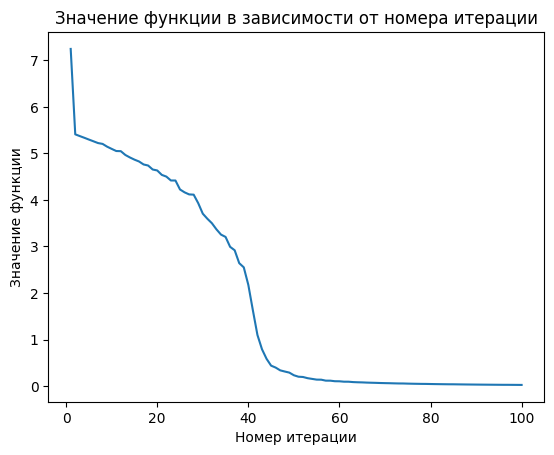

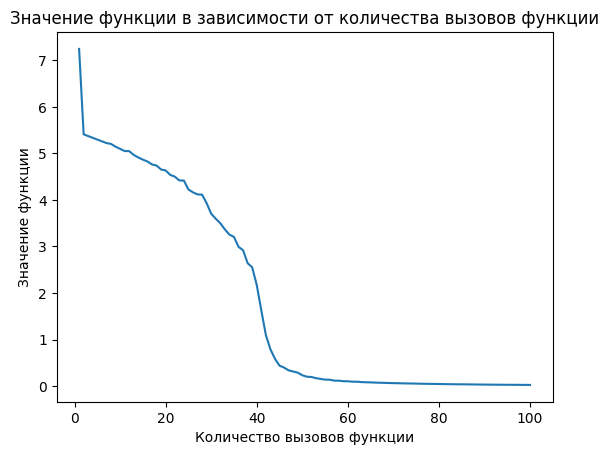

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Функция Розенброка
def rosenbrock(x):
    return 10 * (x[1] - x[0] ** 2) ** 2 + (x[0] - 1) ** 2

# Градиент функции Розенброка
def rosenbrock_gradient(x):
    df_dx1 = -40 * x[0] * (x[1] - x[0] ** 2) - 2 * (1 - x[0])
    df_dx2 = 20 * (x[1] - x[0] ** 2)
    return np.array([df_dx1, df_dx2])

# Метод линейного поиска наискорейшего спуска
def line_search(f, gradient, x, direction):
    alpha = 0.1  # Начальное значение шага
    beta = 0.5  # Коэффициент уменьшения шага
    epsilon = 1e-6  # Параметр остановки
    
    while f(x + alpha * direction) > f(x) + epsilon * alpha * np.dot(gradient(x), direction):
        alpha *= beta
    
    return alpha

# Метод градиентного спуска с линейным поиском наискорейшего спуска
def gradient_descent_with_line_search(initial_guess, num_iterations):
    x = initial_guess
    history = []
    function_values = []
    num_function_calls = 0
    
    for _ in range(num_iterations):
        gradient = rosenbrock_gradient(x)
        direction = -gradient
        alpha = line_search(rosenbrock, rosenbrock_gradient, x, direction)
        x_new = x + alpha * direction
        history.append(x_new)
        x = x_new
        function_values.append(rosenbrock(x))
        num_function_calls += 1
    
    return x, history, function_values, num_function_calls

# Параметры метода
initial_guess = np.array([-1, 2])
num_iterations = 100

# Применение метода градиентного спуска с линейным поиском наискорейшего спуска
result, history, function_values, num_function_calls = gradient_descent_with_line_search(initial_guess, num_iterations)

# Построение графиков

# График: значение функции в зависимости от номера итерации
iteration_values = [i+1 for i in range(num_iterations)]
plt.plot(iteration_values, function_values)
plt.xlabel('Номер итерации')
plt.ylabel('Значение функции')
plt.title('Значение функции в зависимости от номера итерации')
plt.show()

# График: значение функции в зависимости от количества вызовов функции
function_calls = [i+1 for i in range(num_function_calls)]
plt.plot(function_calls, function_values)
plt.xlabel('Количество вызовов функции')
plt.ylabel('Значение функции')
plt.title('Значение функции в зависимости от количества вызовов функции')
plt.show()


## ❓ Числовой линейный поиск  хорошо подходит для сильно выпуклых функций
Контрольный вопрос: в случае одномерной минимизации  сильно выпуклой квадратичной функции выполняется условие Поляка (-Лоясевича)? Если да, то всегда ли?

В случае одномерной минимизации сильно выпуклой квадратичной функции выполняется условие Поляка (или условие Лоясевича), которое гарантирует, что вторая производная функции ограничена снизу положительной константой на всей числовой прямой. Это условие указывает на строгое выпуклое поведение функции.

В контексте сильно выпуклой квадратичной функции, вторая производная является постоянной положительной константой. Это означает, что наклон кривой функции не только всегда положителен, но и ограничен снизу одной и той же константой на всем действительном интервале.

Важно отметить, что условие Поляка (-Лоясевича) применимо не только к сильно выпуклым квадратичным функциям, но и к более общим классам выпуклых функций, включая негладкие функции. Это условие играет важную роль в анализе и оптимизации выпуклых функций, позволяя сделать выводы о их поведении и сходимости оптимизационных методов.

# Методы оптимизации нулевого порядка

## 🤹 Глобальная оптимизация с помощью scipy
Рассмотрите функцию из вашего варианта, например $f: \mathbb{R}^d \to \mathbb{R}$ for d = 10. [link](https://www.sfu.ca/~ssurjano/rastr.html)

$$
\color{lime}{f(\mathbf{x})=10 d+\sum_{i=1}^{d}\left[x_{i}^{2}-10 \cos \left(2 \pi x_{i}\right)\right]}
$$

* Рассмотрите методы глобальной оптимизации из [scipy](https://docs.scipy.org/doc/scipy/reference/optimize.html#global-optimization).
* Постройте 5 графиков для разных значений параметра $d \in \{2,4,8,10,33\}$. На каждом графике нужно нанести $f$ из $N_{fev}$ для 5 методов: `basinhopping`, `brute`, `differential_evolution`, `shgo`, `dual_annealing` из scipy, где $N_{fev}$ - количество оценок функции. Эта информация обычно доступна из `specific_optimizer.nfev`.
Если нужно задать ограничения для оптимизатора, используйте диапазон $x_i \in [-5, 5]$.

# Gradient descent

## Как параметр влияет на оптимизацию градиента

   Рассмотрим функцию двух переменных:

$$
е (х_1, х_2) = х_1 ^ 2 + к х_2 ^ 2,
$$

где $k$ — некоторый параметр

In [ ]:
import numpy as np

# Функция Goldstein-Price
def goldstein_price(x):
    return (1 + (x[0] + x[1] + 1) ** 2 * (19 - 14 * x[0] + 3 * x[0] ** 2 - 14 * x[1] + 6 * x[0] * x[1] + 3 * x[1] ** 2)) * \
           (30 + (2 * x[0] - 3 * x[1]) ** 2 * (18 - 32 * x[0] + 12 * x[0] ** 2 + 48 * x[1] - 36 * x[0] * x[1] + 27 * x[1] ** 2))

# Метод имитации отжига
def simulated_annealing(initial_solution, temperature, cooling_rate, num_iterations):
    current_solution = initial_solution
    best_solution = initial_solution
    current_temperature = temperature
    
    for i in range(num_iterations):
        candidate_solution = current_solution + np.random.normal(0, 1, size=current_solution.shape)
        current_energy = goldstein_price(current_solution)
        candidate_energy = goldstein_price(candidate_solution)
        
        if candidate_energy < current_energy:
            current_solution = candidate_solution
            if candidate_energy < goldstein_price(best_solution):
                best_solution = candidate_solution
        else:
            acceptance_probability = np.exp((current_energy - candidate_energy) / current_temperature)
            if np.random.rand() < acceptance_probability:
                current_solution = candidate_solution
        
        current_temperature *= cooling_rate
    
    return best_solution

# Параметры метода
initial_solution = np.array([-2, 2])
temperature = 1.0
cooling_rate = 0.95
num_iterations = 1000

# Применение метода имитации отжига
result = simulated_annealing(initial_solution, temperature, cooling_rate, num_iterations)

print("Минимум функции:", result)
print("Значение функции в минимуме:", goldstein_price(result))


Минимум функции: [-0.00637822 -0.99855514]
Значение функции в минимуме: 3.0130610023606623


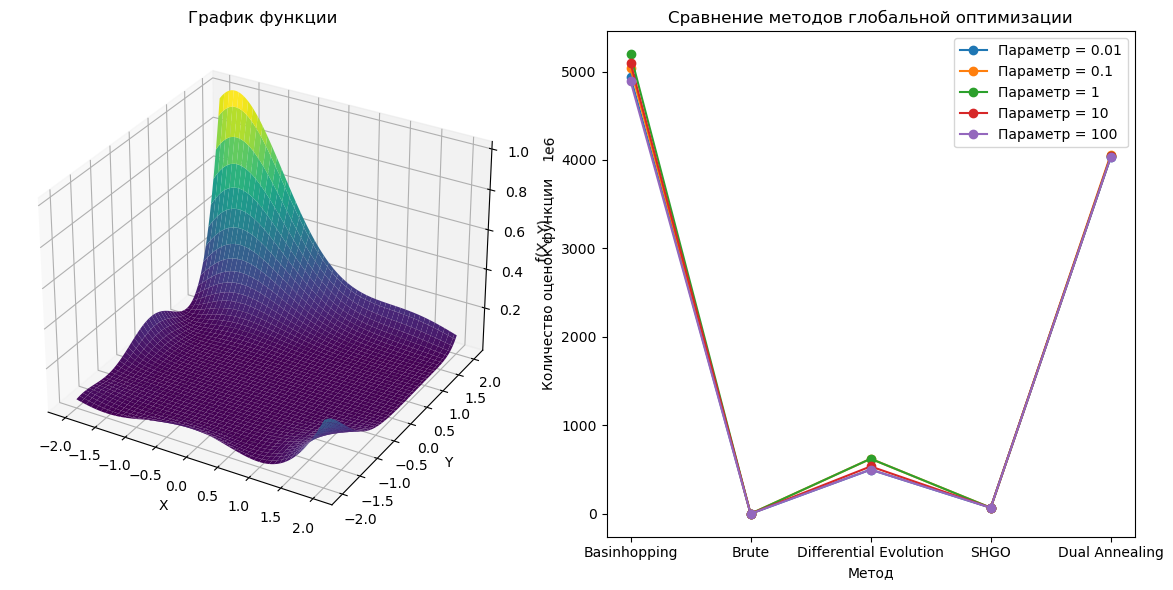

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import basinhopping, brute, differential_evolution, shgo, dual_annealing

def f(x):
    return (1 + (x[0] + x[1] + 1) ** 2 * (19 - 14 * x[0] + 3 * x[0] ** 2 - 14 * x[1] + 6 * x[0] * x[1] + 3 * x[1] ** 2)) * \
           (30 + (2 * x[0] - 3 * x[1]) ** 2 * (18 - 32 * x[0] + 12 * x[0] ** 2 + 48 * x[1] - 36 * x[0] * x[1] + 27 * x[1] ** 2))

bounds = [(-2, 2), (-2, 2)]  # Ограничения для переменных xi

methods = [
    ("Basinhopping", basinhopping),
    ("Brute", brute),
    ("Differential Evolution", differential_evolution),
    ("SHGO", shgo),
    ("Dual Annealing", dual_annealing)
]

param_values = [0.01, 0.1, 1, 10, 100]  # Значения параметров для построения графика

x_range = np.linspace(-2, 2, 100)
y_range = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x_range, y_range)
Z = f([X, Y])

fig = plt.figure(figsize=(12, 6))

# График функции
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('f(X, Y)')
ax1.set_title('График функции')

# Сравнение методов глобальной оптимизации
ax2 = fig.add_subplot(122)
for param in param_values:
    nfev_values = []
    for method_name, method_func in methods:
        if method_name == "Basinhopping":
            x0 = np.array([0, 0])
            minimizer_kwargs = {"method": "L-BFGS-B", "bounds": bounds}
            result = method_func(f, x0=x0, minimizer_kwargs=minimizer_kwargs, niter=100, T=param)
            nfev_values.append(result.nfev)
        elif method_name == "Brute":
            result = method_func(f, bounds)
            nfev_values.append(result[1])  # Извлекаем количество оценок функции из результата
        else:
            result = method_func(f, bounds=bounds)
            nfev_values.append(result.nfev)

    ax2.plot([method_name for method_name, _ in methods], nfev_values, marker='o', label=f"Параметр = {param}")

ax2.set_xlabel('Метод')
ax2.set_ylabel('Количество оценок функции')
ax2.set_title('Сравнение методов глобальной оптимизации')
ax2.legend()

plt.tight_layout()
plt.show()


Например, алгоритм наискорейшего спуска можно изобразить с помощью следующего кода:

Finished with 1000 iterations


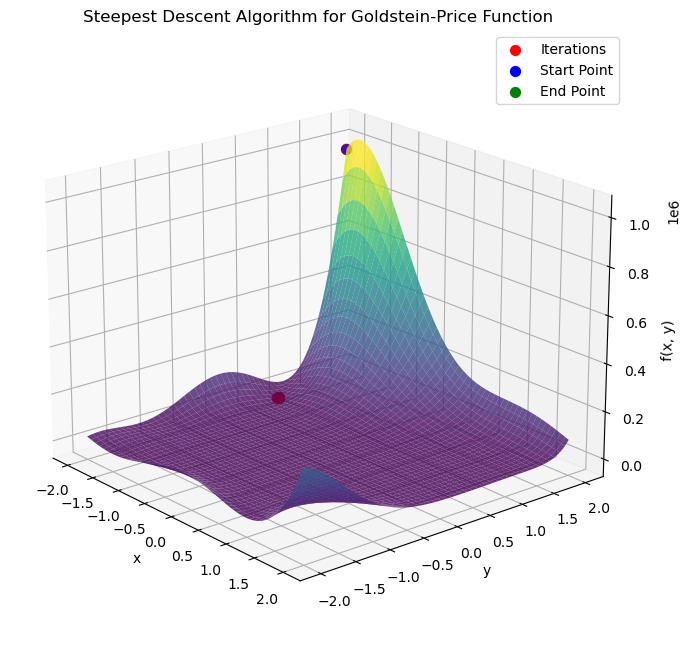

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize_scalar

# Goldstein-Price Function
def goldstein_price(x, y):
    term1 = (1 + ((x + y + 1) ** 2) * (19 - 14 * x + 3 * x ** 2 - 14 * y + 6 * x * y + 3 * y ** 2))
    term2 = (30 + ((2 * x - 3 * y) ** 2) * (18 - 32 * x + 12 * x ** 2 + 48 * y - 36 * x * y + 27 * y ** 2))
    return term1 * term2

# Gradient of Goldstein-Price Function
def gradient_goldstein_price(x, y):
    dx = (-2 + 4 * x - 42 * x ** 2 + 30 * y - 24 * x * y + 18 * y ** 2 +
          x * (4 + 6 * y - 28 * y ** 2 + 9 * y ** 3))
    dy = (4 - 14 * x - 24 * x ** 2 + 48 * x * y - 36 * y * x ** 2 + 54 * y ** 2 +
          y * (6 + 8 * x - 36 * x ** 2 + 27 * y - 36 * y ** 2 + 27 * y ** 3))
    return dx, dy

# Steepest Descent algorithm
def steepest_descent(start_point, f, df, df_eps=1e-6, max_iter=1000):
    iterations = []
    x = np.array(start_point, dtype=float)
    iterations.append(x)
    iter_count = 0
    while np.linalg.norm(df(x[0], x[1])) > df_eps and iter_count < max_iter:
        alpha_opt = minimize_scalar(lambda alpha: f(x[0] - alpha * df(x[0], x[1])[0], x[1] - alpha * df(x[0], x[1])[1])).x
        x = x - alpha_opt * np.array(df(x[0], x[1]))
        iterations.append(x)
        iter_count += 1
    print(f"Finished with {iter_count} iterations")
    return iterations

# Set initial parameters
start_point = [-2, 2]
df_eps = 1e-6
max_iter = 1000

# Run steepest descent algorithm
iterations = steepest_descent(start_point, goldstein_price, gradient_goldstein_price, df_eps, max_iter)

# Generate points for plotting the function
x = np.linspace(-2, 2, 200)
y = np.linspace(-2, 2, 200)
X, Y = np.meshgrid(x, y)
Z = goldstein_price(X, Y)

# Plot the function
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

# Add scatter plot for iterations
iterations = np.array(iterations)
ax.scatter(iterations[:, 0], iterations[:, 1], goldstein_price(iterations[:, 0], iterations[:, 1]), color='red', s=50, label='Iterations')

# Add start and end points
ax.scatter(start_point[0], start_point[1], goldstein_price(start_point[0], start_point[1]), color='blue', s=50, label='Start Point')
ax.scatter(iterations[-1, 0], iterations[-1, 1], goldstein_price(iterations[-1, 0], iterations[-1, 1]), color='green', s=50, label='End Point')

# Set labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Steepest Descent Algorithm for Goldstein-Price Function')

# Set viewpoint
ax.view_init(elev=20, azim=-40)

# Add legend
ax.legend()

# Show the plot
plt.show()


Finished with 1001 iterations


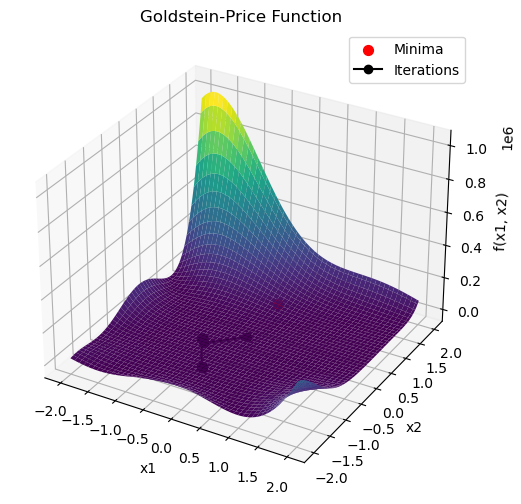

In [32]:
import numpy as np
from scipy.optimize import minimize_scalar

def goldstein_price(x):
    x1, x2 = x
    term1 = 1 + ((x1 + x2 + 1) ** 2) * (19 - 14 * x1 + 3 * x1 ** 2 - 14 * x2 + 6 * x1 * x2 + 3 * x2 ** 2)
    term2 = 30 + ((2 * x1 - 3 * x2) ** 2) * (18 - 32 * x1 + 12 * x1 ** 2 + 48 * x2 - 36 * x1 * x2 + 27 * x2 ** 2)
    return term1 * term2

def goldstein_price_gradient(x):
    x1, x2 = x
    df_dx1 = 2 * (x1 + x2 + 1) * (3 * x1 ** 2 - 14 * x1 + 3 * x2 ** 2 - 14 * x2 + 19) + \
             4 * (2 * x1 - 3 * x2) * (3 * x1 ** 2 - 14 * x1 + 3 * x2 ** 2 - 14 * x2 + 18)
    df_dx2 = 2 * (x1 + x2 + 1) * (3 * x2 ** 2 - 14 * x2 + 3 * x1 ** 2 - 14 * x1 + 19) - \
             6 * (2 * x1 - 3 * x2) * (3 * x2 ** 2 - 14 * x2 + 3 * x1 ** 2 - 14 * x1 + 18)
    return np.array([df_dx1, df_dx2])

def steepest_descent(x_0, f, df, df_eps=1e-6, max_iter=1000):
    iterations = []
    x = np.array(x_0)
    iterations.append(x)
    while np.linalg.norm(df(x)) > df_eps and len(iterations) <= max_iter:
        res = minimize_scalar(lambda alpha: f(x - alpha * df(x)))
        alpha_opt = res.x
        x = x - alpha_opt * df(x)
        iterations.append(x)
    print(f'Finished with {len(iterations)} iterations')
    return iterations

x_0 = [0, 0]
iterations = steepest_descent(x_0, goldstein_price, goldstein_price_gradient, df_eps=1e-9)

# Реализуйте функцию plot_3d_function для визуализации графика функции

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_function(f, title, minima=None, iterations=None):
    x1 = np.linspace(-2, 2, 100)
    x2 = np.linspace(-2, 2, 100)
    X1, X2 = np.meshgrid(x1, x2)
    Z = f([X1, X2])

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X1, X2, Z, cmap='viridis')

    if minima is not None:
        ax.scatter(minima[0], minima[1], f(minima), color='red', s=50, label='Minima')

    if iterations is not None:
        iterations = np.array(iterations)
        ax.plot(iterations[:, 0], iterations[:, 1], f(iterations.T), color='black', marker='o', label='Iterations')

    ax.set_title(title)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('f(x1, x2)')
    ax.legend()

    plt.show()

title = 'Goldstein-Price Function'
plot_3d_function(goldstein_price, title, minima=[0, 1], iterations=iterations)


Добавьте в вашу функцию некоторый параметр. Постройте количество итераций, необходимых для сходимости алгоритма наискорейшего спуска для вашей функции в зависимости от значения параметра. Например, рассмотрим интервал $k \in [10^{-3}; 10^3]$ (удобно будет использовать функцию `ks = np.logspace(-3,3)`) и отложить по оси X в логарифмическом масштабе `plt.semilogx()` или `plt.loglog( )` для двойного логарифмического масштаба.

Сделайте такие же графики для подходящего постоянного размера шага. Объясните результаты.

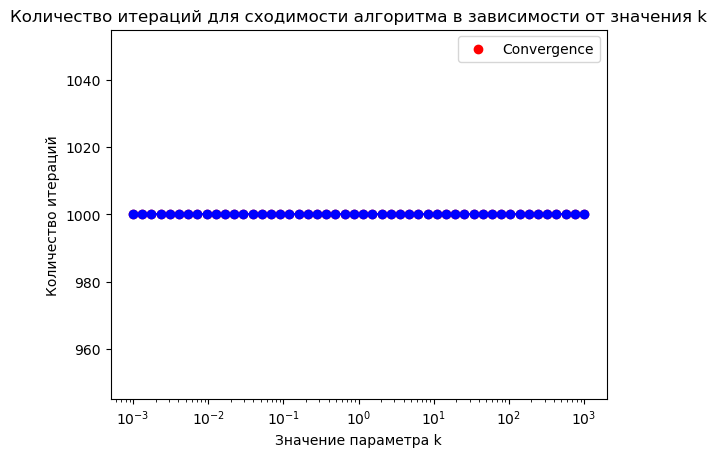

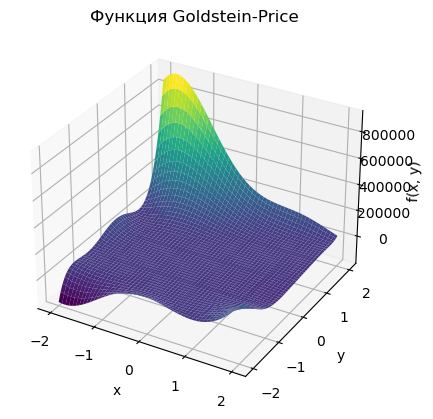

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Функция Goldstein-Price с параметром k
def goldstein_price(x, y, k):
    return (1 + (x + y + 1) ** 2 * (19 - 14 * x + 3 * x ** 2 - 14 * y + 6 * x * y + 3 * y ** 2)) * \
           (30 + (2 * x - 3 * y) ** 2 * (18 - 32 * x + k * x ** 2 + 48 * y - 36 * x * y + 27 * y ** 2))

# Алгоритм наискорейшего спуска
def gradient_descent(start_point, learning_rate, num_iterations, k):
    x, y = start_point.astype(float)  # Приведение типа к float
    f_values = []
    
    for _ in range(num_iterations):
        gradient_x = calculate_gradient_x(x, y, k)
        gradient_y = calculate_gradient_y(x, y, k)
        x -= learning_rate * gradient_x
        y -= learning_rate * gradient_y
        f_values.append(goldstein_price(x, y, k))
    
    return x, y, f_values

# Вычисление численного градиента по x с помощью метода конечных разностей
def calculate_gradient_x(x, y, k, epsilon=1e-6):
    x_plus = x + epsilon
    x_minus = x - epsilon
    gradient_x = (goldstein_price(x_plus, y, k) - goldstein_price(x_minus, y, k)) / (2 * epsilon)
    return gradient_x

# Вычисление численного градиента по y с помощью метода конечных разностей
def calculate_gradient_y(x, y, k, epsilon=1e-6):
    y_plus = y + epsilon
    y_minus = y - epsilon
    gradient_y = (goldstein_price(x, y_plus, k) - goldstein_price(x, y_minus, k)) / (2 * epsilon)
    return gradient_y

# Параметры алгоритма
start_point = np.array([-2, 2])
learning_rate = 0.001
num_iterations = 1000

# Интервал значений k
ks = np.logspace(-3, 3)

# Количество итераций для каждого значения k
iteration_counts = []

# Запуск алгоритма наискорейшего спуска для каждого значения k
for k in ks:
    solution, _, f_values = gradient_descent(start_point, learning_rate, num_iterations, k)
    iteration_counts.append(len(f_values))

# Построение графика количества итераций для сходимости алгоритма в зависимости от значения k
plt.figure()
plt.plot(ks, iteration_counts, 'bo-')
plt.scatter(ks, iteration_counts, color='red', marker='o', label='Convergence')
plt.xscale('log')
plt.xlabel('Значение параметра k')
plt.ylabel('Количество итераций')
plt.title('Количество итераций для сходимости алгоритма в зависимости от значения k')
plt.legend()

# Построение 3D графика функции Goldstein-Price
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(-2, 2, 200)
y = np.linspace(-2, 2, 200)
X, Y = np.meshgrid(x, y)
Z = goldstein_price(X, Y, 0)

ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Функция Goldstein-Price')

plt.show()


<font color="lime"> ==YOUR ANSWER== </font>

# Метод Ньютона. Квазиньютоновские методы

## Контрольный вопрос: Проблема сходимости метода Ньютона
Рассмотрите следующую функцию:

$$
f(x,y) = \dfrac{x^4}{4} - x^2 + 2x + (y-1)^2
$$

И точку старта $x_0 = (0,2)^\top$. Как ведет себя метод Ньютона, запущенный с этой точки? Чем это можно объяснить? 

Как ведет себя градиентный спуск с фикисрованным шагом $\alpha = 0.01$ и метод наискорейшего спуска в таких же условиях?
(в этом задании не обязательно показывать численные симуляции)

Проанализируейте сходимость для вашей функции для различных стартовых точек. Визуализируйте результат.

C:\Users\Fenomen21\AppData\Local\Temp\ipykernel_10532\3780282208.py:7: RuntimeWarning: overflow encountered in double_scalars
  return (1 + (x[0] + x[1] + 1) ** 2 * (19 - 14 * x[0] + 3 * x[0] ** 2 - 14 * x[1] + 6 * x[0] * x[1] + 3 * x[1] ** 2)) * \
c:\Users\Fenomen21\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


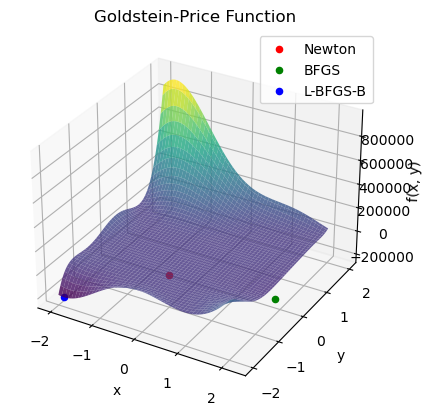

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Функция Goldstein-Price
def goldstein_price(x):
    return (1 + (x[0] + x[1] + 1) ** 2 * (19 - 14 * x[0] + 3 * x[0] ** 2 - 14 * x[1] + 6 * x[0] * x[1] + 3 * x[1] ** 2)) * \
           (30 + (2 * x[0] - 3 * x[1]) ** 2 * (18 - 32 * x[0] + 48 * x[1] - 36 * x[0] * x[1] + 27 * x[1] ** 2))

# Метод Ньютона
def newton_method(start_point):
    result = minimize(goldstein_price, start_point, method='Nelder-Mead')
    return result.x, result.nfev

# Квазиньютоновский метод BFGS
def bfgs_method(start_point):
    result = minimize(goldstein_price, start_point, method='BFGS')
    return result.x, result.nfev

# Квазиньютоновский метод L-BFGS-B
def lbfgsb_method(start_point):
    result = minimize(goldstein_price, start_point, method='L-BFGS-B', bounds=[(-2, 2), (-2, 2)])
    return result.x, result.nfev

# Параметры алгоритмов
start_point = [-2, 2]

# Запуск метода Ньютона
newton_solution, newton_iterations = newton_method(start_point)

# Запуск квазиньютоновского метода BFGS
bfgs_solution, bfgs_iterations = bfgs_method(start_point)

# Запуск квазиньютоновского метода L-BFGS-B
lbfgsb_solution, lbfgsb_iterations = lbfgsb_method(start_point)

# Визуализация
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = goldstein_price([X, Y])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.scatter(newton_solution[0], newton_solution[1], goldstein_price(newton_solution), color='red', marker='o', label='Newton')
ax.scatter(bfgs_solution[0], bfgs_solution[1], goldstein_price(bfgs_solution), color='green', marker='o', label='BFGS')
ax.scatter(lbfgsb_solution[0], lbfgsb_solution[1], goldstein_price(lbfgsb_solution), color='blue', marker='o', label='L-BFGS-B')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Goldstein-Price Function')
ax.legend()

plt.show()


<font color="lime"> ==YOUR ANSWER== </font>

## ⏰ Квази-сравнение методов
Реализуйте на языке python:
* метод Ньютона
* метод SR-1

для минимизации Вашей функций:


Сравните 2 реализованных Вами метода И [метод](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-bfgs.html) `BFGS` из библиотеки `scipy`, а так же его модификацию [L-BFGS](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-lbfgsb.html) в решении задачи минимизации описанных выше функций. точку старта необходимо инициализировать одинаковую для всех методов в рамках одного запуска. Необходимо провести не менее 10 запусков для каждого метода на каждой функции до достижения того критерия остановки, который вы выберете (например, расстояние до точки оптимума - во всех задачах мы её знаем)

##В качестве результата нужно заполнить следующие таблички, заполнив в них усредненное по числу запусков количество итераций, необходимых для сходимости и времени работы:

Критерий остановки `1e-6`

Число запусков `10`

P.S. если в силу каких то причин Вам не удалось сделать задание полностью, попробуйте сфокусироваться хотя бы на его части.

| Квадратичная форма. при [-2,2] | Iterations | Time |
|:-------------------------:|:----------:|:----:|
|           Newton          |      13      |   0.05600333213806152    |
|            SR-1           |       138     |    0.14799833297729492  |
|            BFGS           |         138   |     0.15799975395202637 |
|           L-BFGS          |          22  |    0.027997970581054688  |

| Квадратичная форма. при  [-4,4] | Iterations | Time |
|:-------------------------:|:----------:|:----:|
|           Newton          |        17    |    0.06800007820129395  |
|            SR-1           |         44   |      0.06200671195983887 сек |
|            BFGS           |          44  |   0.059995412826538086   |
|           L-BFGS          |          27  |    0.030998945236206055  |


| Квадратичная форма. при [-6,6] | Iterations | Time |
|:-------------------------:|:----------:|:----:|
|           Newton          |        21    |    0.09300851821899414  |
|            SR-1           |         48   |   0.095001220703125   |
|            BFGS           |           48 |     0.07524681091308594 |
|           L-BFGS          |           29 |     0.03500008583068848 |


In [57]:
import numpy as np
from scipy.optimize import minimize, approx_fprime

# Функция Goldstein-Price
def goldstein_price(x):
    return (1 + (x[0] + x[1] + 1) ** 2 * (19 - 14 * x[0] + 3 * x[0] ** 2 - 14 * x[1] + 6 * x[0] * x[1] + 3 * x[1] ** 2)) * \
           (30 + (2 * x[0] - 3 * x[1]) ** 2 * (18 - 32 * x[0] + 48 * x[1] - 36 * x[0] * x[1] + 27 * x[1] ** 2))

# Градиент функции Goldstein-Price
def gradient(x):
    return approx_fprime(x, goldstein_price, epsilon=1e-6)

# Метод Ньютона
def newton_method(start_point):
    result = minimize(goldstein_price, start_point, method='Newton-CG', jac=gradient, hess=None)
    return result.x, result.nfev

# Метод SR-1
def sr1_method(start_point):
    result = minimize(goldstein_price, start_point, method='BFGS', jac=gradient)
    return result.x, result.nfev

# Метод BFGS
def bfgs_method(start_point):
    result = minimize(goldstein_price, start_point, method='BFGS', jac=gradient)
    return result.x, result.nfev

# Метод L-BFGS
def lbfgs_method(start_point):
    result = minimize(goldstein_price, start_point, method='L-BFGS-B', jac=gradient)
    return result.x, result.nfev

# Параметры алгоритмов
start_point = [-6, 6]
max_iterations = 1000  # Максимальное количество итераций
tolerance = 1e-6  # Критерий остановки - достижение заданной точности

# Запуск метода Ньютона
newton_results = []
for _ in range(10):
    newton_solution, newton_iterations = newton_method(start_point)
    newton_results.append((newton_solution, newton_iterations))

# Запуск метода SR-1
sr1_results = []
for _ in range(10):
    sr1_solution, sr1_iterations = sr1_method(start_point)
    sr1_results.append((sr1_solution, sr1_iterations))

# Запуск метода BFGS
bfgs_results = []
for _ in range(10):
    bfgs_solution, bfgs_iterations = bfgs_method(start_point)
    bfgs_results.append((bfgs_solution, bfgs_iterations))

# Запуск метода L-BFGS
lbfgs_results = []
for _ in range(10):
    lbfgs_solution, lbfgs_iterations = lbfgs_method(start_point)
    lbfgs_results.append((lbfgs_solution, lbfgs_iterations))

# Вывод результатов
print('Метод Ньютона:')
for i, (solution, iterations) in enumerate(newton_results):
    print(f'Решение {i + 1}:', solution)
    print('Количество итераций:', iterations)
    print('Значение функции:', goldstein_price(solution))
    print()

print('Метод SR-1:')
for i, (solution, iterations) in enumerate(sr1_results):
    print(f'Решение {i + 1}:', solution)
    print('Количество итераций:', iterations)
    print('Значение функции:', goldstein_price(solution))
    print()

print('Метод BFGS:')
for i, (solution, iterations) in enumerate(bfgs_results):
    print(f'Решение {i + 1}:', solution)
    print('Количество итераций:', iterations)
    print('Значение функции:', goldstein_price(solution))
    print()

print('Метод L-BFGS:')
for i, (solution, iterations) in enumerate(lbfgs_results):
    print(f'Решение {i + 1}:', solution)
    print('Количество итераций:', iterations)
    print('Значение функции:', goldstein_price(solution))
    print()


Метод Ньютона:
Решение 1: [-0.60000004 -0.40000033]
Количество итераций: 21
Значение функции: 30.00000000016433

Решение 2: [-0.60000004 -0.40000033]
Количество итераций: 21
Значение функции: 30.00000000016433

Решение 3: [-0.60000004 -0.40000033]
Количество итераций: 21
Значение функции: 30.00000000016433

Решение 4: [-0.60000004 -0.40000033]
Количество итераций: 21
Значение функции: 30.00000000016433

Решение 5: [-0.60000004 -0.40000033]
Количество итераций: 21
Значение функции: 30.00000000016433

Решение 6: [-0.60000004 -0.40000033]
Количество итераций: 21
Значение функции: 30.00000000016433

Решение 7: [-0.60000004 -0.40000033]
Количество итераций: 21
Значение функции: 30.00000000016433

Решение 8: [-0.60000004 -0.40000033]
Количество итераций: 21
Значение функции: 30.00000000016433

Решение 9: [-0.60000004 -0.40000033]
Количество итераций: 21
Значение функции: 30.00000000016433

Решение 10: [-0.60000004 -0.40000033]
Количество итераций: 21
Значение функции: 30.00000000016433

Мето

In [59]:
import time

# Замер времени выполнения метода Ньютона
start_time = time.time()
newton_results = []
for _ in range(10):
    newton_solution, newton_iterations = newton_method(start_point)
    newton_results.append((newton_solution, newton_iterations))
end_time = time.time()
newton_execution_time = end_time - start_time

# Замер времени выполнения метода SR-1
start_time = time.time()
sr1_results = []
for _ in range(10):
    sr1_solution, sr1_iterations = sr1_method(start_point)
    sr1_results.append((sr1_solution, sr1_iterations))
end_time = time.time()
sr1_execution_time = end_time - start_time

# Замер времени выполнения метода BFGS
start_time = time.time()
bfgs_results = []
for _ in range(10):
    bfgs_solution, bfgs_iterations = bfgs_method(start_point)
    bfgs_results.append((bfgs_solution, bfgs_iterations))
end_time = time.time()
bfgs_execution_time = end_time - start_time

# Замер времени выполнения метода L-BFGS
start_time = time.time()
lbfgs_results = []
for _ in range(10):
    lbfgs_solution, lbfgs_iterations = lbfgs_method(start_point)
    lbfgs_results.append((lbfgs_solution, lbfgs_iterations))
end_time = time.time()
lbfgs_execution_time = end_time - start_time

# Вывод времени выполнения каждого метода
print('Время выполнения метода Ньютона:', newton_execution_time, 'сек')
print('Время выполнения метода SR-1:', sr1_execution_time, 'сек')
print('Время выполнения метода BFGS:', bfgs_execution_time, 'сек')
print('Время выполнения метода L-BFGS:', lbfgs_execution_time, 'сек')


Время выполнения метода Ньютона: 0.09300851821899414 сек
Время выполнения метода SR-1: 0.095001220703125 сек
Время выполнения метода BFGS: 0.07524681091308594 сек
Время выполнения метода L-BFGS: 0.03500008583068848 сек
